In [1]:
import tensorflow as tf
import tarfile
import pathlib

dataset = tf.keras.utils.get_file(
    fname="aclImdb.tar.gz",
    origin="https://gitlab.com/mateusbatista4/ml-data/-/raw/main/archive-2.tar.gz",
    extract=True,
)

if dataset.endswith("tar.gz"):
   tar = tarfile.open(dataset, "r:gz")
   tar.extractall()
   tar.close()
data_dir = pathlib.Path(dataset)


74982704/74982704 [==============================] - 1s 0us/step


In [2]:
import zipfile
import shutil
import gdown
import os

gdown.download(id='1nRzEpurrEF7lK95wT2GRZuWD9VdNDQoi', output = "large_mushroom.zip",quiet=False)

with zipfile.ZipFile("large_mushroom.zip","r") as zip_ref:
    zip_ref.extractall("large_mushroom")

target_dir = './train_mushroom_dataset/edible'
for source in ['./large_mushroom/edible mushroom sporocarp','./large_mushroom/edible sporocarp']:
  file_names = os.listdir(source)
  for file_name in file_names:
    if not os.path.exists(target_dir):
            os.makedirs(target_dir)
    shutil.move(os.path.join(source, file_name), target_dir)

target_dir = './train_mushroom_dataset/poisonous'
for source in ['./large_mushroom/poisonous mushroom sporocarp','./large_mushroom/poisonous sporocarp']:
  file_names = os.listdir(source)
  for file_name in file_names:
    if not os.path.exists(target_dir):
            os.makedirs(target_dir)
    shutil.move(os.path.join(source, file_name), target_dir)

Downloading...
From (original): https://drive.google.com/uc?id=1nRzEpurrEF7lK95wT2GRZuWD9VdNDQoi
From (redirected): https://drive.google.com/uc?id=1nRzEpurrEF7lK95wT2GRZuWD9VdNDQoi&confirm=t&uuid=79af39c4-4e89-4174-ad1b-f0d78c363c51
To: /content/large_mushroom.zip
100%|██████████| 269M/269M [00:06<00:00, 40.9MB/s]


In [3]:
src_dir = './mushroom_dataset/conditionally_edible'
dst_dir = './mushroom_dataset/edible'
shutil.copytree(src_dir, dst_dir, dirs_exist_ok=True)

src_dir = './mushroom_dataset/deadly'
dst_dir = './mushroom_dataset/poisonous'
shutil.copytree(src_dir, dst_dir, dirs_exist_ok=True)

'./mushroom_dataset/poisonous'

In [4]:
shutil.rmtree('./large_mushroom/')

In [5]:
shutil.rmtree('./mushroom_dataset/conditionally_edible')
shutil.rmtree('./mushroom_dataset/deadly')

In [8]:
def count_files_in_directory(directory):
   count = 0
   for root, dirs, files in os.walk(directory):
       count += len(files)
   return count

directory = './mushroom_dataset/edible'
print(count_files_in_directory(directory))
directory = './mushroom_dataset/poisonous'
print(count_files_in_directory(directory))
directory = './train_mushroom_dataset/edible'
print(count_files_in_directory(directory))
directory = './train_mushroom_dataset/poisonous'
print(count_files_in_directory(directory))

2895
5573
1181
2220


In [2]:
train_data_dir = './train_mushroom_dataset/'
test_data_dir = './mushroom_dataset/'

In [ ]:
train_generator.classes.sum()

NameError: ignored

In [3]:
import tensorflow as tf


img_height,img_width=180,180

batch_size=200

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3401 files belonging to 2 classes.
Using 2721 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3401 files belonging to 2 classes.
Using 680 files for validation.


In [5]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    image_size=(img_height, img_width),  # Especifique as dimensões das imagens
    batch_size=batch_size
)

Found 8468 files belonging to 2 classes.


In [15]:
class_names = train_ds.class_names
print(class_names)

['edible', 'poisonous']


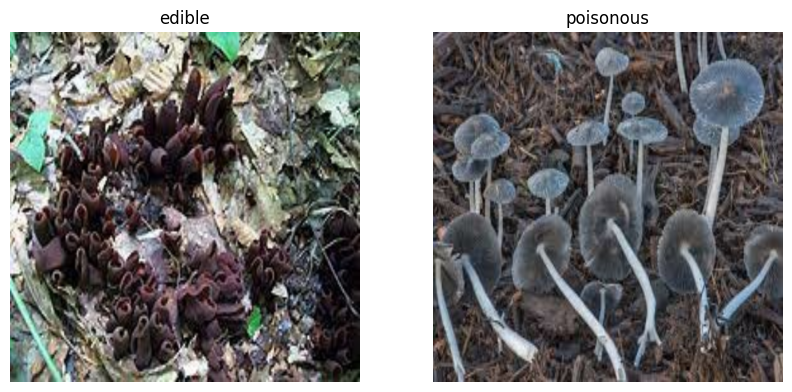

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(2):
    ax = plt.subplot(2, 2,i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    ax.title.set_text(class_names[i])
    plt.axis("off")

In [6]:

from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg', classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False


resnet_model.add(pretrained_model)

resnet_model.add(tf.keras.layers.Dropout(0.4))
resnet_model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
resnet_model.add(tf.keras.layers.Dropout(0.3))
resnet_model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
resnet_model.add(tf.keras.layers.Dropout(0.4))
resnet_model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
resnet_model.add(tf.keras.layers.Dropout(0.3))
resnet_model.add(Dense(2, activation='softmax'))

In [7]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 module_wrapper (ModuleWrap  (None, 64)                131136    
 per)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 module_wrapper_1 (ModuleWr  (None, 32)                2080      
 apper)                                                          
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

In [8]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

resnet_model.compile(optimizer=RMSprop(learning_rate=0.003),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
epochs=35
## USUAL FIT

history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/35
14/14 [==============================] - 40s 1s/step - loss: 0.9482 - accuracy: 0.5671 - val_loss: 0.6531 - val_accuracy: 0.6618
Epoch 2/35
14/14 [==============================] - 14s 720ms/step - loss: 0.6823 - accuracy: 0.6068 - val_loss: 0.6438 - val_accuracy: 0.6735
Epoch 3/35
14/14 [==============================] - 17s 932ms/step - loss: 0.6373 - accuracy: 0.6501 - val_loss: 0.6216 - val_accuracy: 0.6706
Epoch 4/35
14/14 [==============================] - 14s 722ms/step - loss: 0.6167 - accuracy: 0.6564 - val_loss: 0.5951 - val_accuracy: 0.6662
Epoch 5/35
14/14 [==============================] - 16s 867ms/step - loss: 0.5935 - accuracy: 0.6523 - val_loss: 0.5789 - val_accuracy: 0.6868
Epoch 6/35
14/14 [==============================] - 14s 734ms/step - loss: 0.5955 - accuracy: 0.6887 - val_loss: 0.5736 - val_accuracy: 0.6912
Epoch 7/35
14/14 [==============================] - 14s 720ms/step - loss: 0.5797 - accuracy: 0.6942 - val_loss: 0.5612 - val_accuracy: 0.7279
Ep

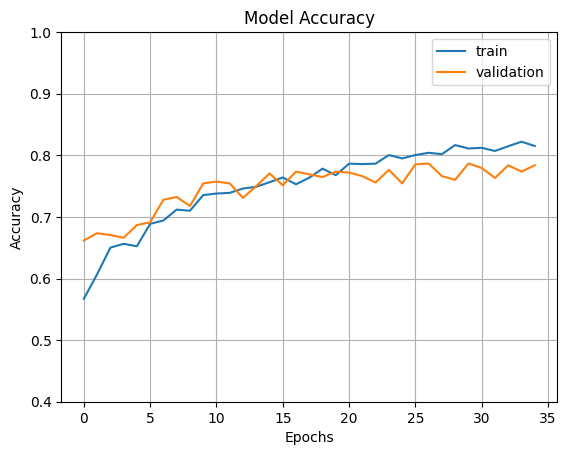

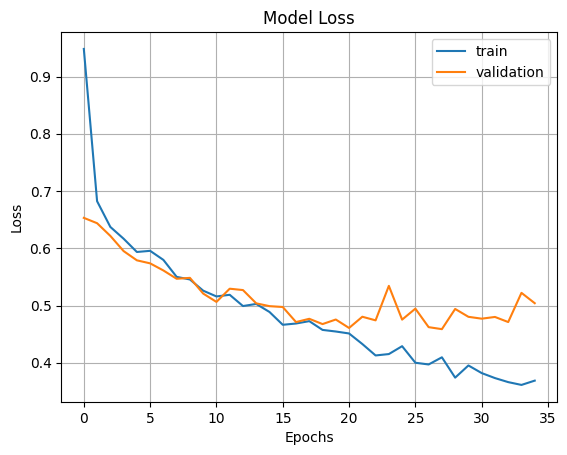

In [11]:
import matplotlib.pyplot as plt

# ACCURACY
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# MODEL LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Avaliação do modelo nos dados de teste
predictions = resnet_model.evaluate(test_dataset)

# Exibindo os resultados
print("Test Loss:", predictions[0])
print("Test Accuracy:", predictions[1])


43/43 [==============================] - 21s 447ms/step - loss: 0.8591 - accuracy: 0.6460
Test Loss: 0.8590871691703796
Test Accuracy: 0.6459612846374512


In [13]:
# Supondo que você tenha um modelo treinado chamado resnet_model
from sklearn.metrics import confusion_matrix, classification_report

# Fazendo previsões no conjunto de teste
predictions = resnet_model.predict(test_dataset)

# Convertendo as previsões para classes (por exemplo, assumindo que estamos trabalhando com classificação binária)
predicted_classes = [1 if prediction[0] > 0.5 else 0 for prediction in predictions]

# Obtendo os rótulos verdadeiros do conjunto de teste
true_classes = []
for images, labels in test_dataset:
    true_classes.extend(labels.numpy())

# Importando a função para criar a matriz de confusão
from sklearn.metrics import confusion_matrix

# Criando a matriz de confusão
confusion = confusion_matrix(true_classes, predicted_classes)
print(confusion)

report = classification_report(true_classes, predicted_classes)

# Exibindo as estatísticas
print("Matriz de Confusão:")
print(confusion)
print("\nEstatísticas:")
print(report)

43/43 [==============================] - 19s 385ms/step
[[2114  781]
 [4155 1418]]
Matriz de Confusão:
[[2114  781]
 [4155 1418]]

Estatísticas:
              precision    recall  f1-score   support

           0       0.34      0.73      0.46      2895
           1       0.64      0.25      0.36      5573

    accuracy                           0.42      8468
   macro avg       0.49      0.49      0.41      8468
weighted avg       0.54      0.42      0.40      8468



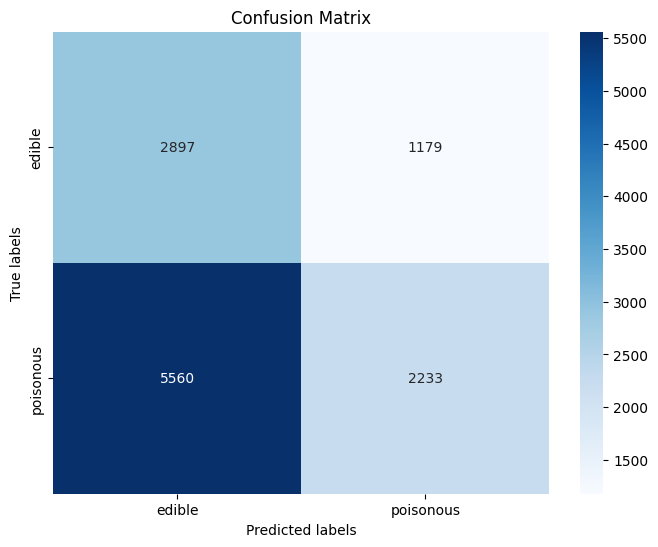

In [ ]:
# Supondo que você tenha as previsões e os rótulos verdadeiros já obtidos
import seaborn as sns
# Criando a matriz de confusão
confusion = confusion_matrix(true_classes, predicted_classes)

# Definindo os rótulos das classes (substitua com seus próprios rótulos se necessário)
classes = ['edible', 'poisonous']

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
## DATA AUGMENTATION

from keras.preprocessing.image import ImageDataGenerator


img_width, img_height = 180, 180
batch_size = 150

data_dir = '/content/train_mushroom_dataset'

datagen = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=25,     #Rotação aleatória entre 0 e 45º
        rescale=1. / 255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='constant', cval=125)    #Tentar tbm nearest, constant, reflect, wrap

# Gera batches de dados de treinamento e validação a partir do diretório
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training')

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation')

Found 7872 images belonging to 4 classes.
Found 1967 images belonging to 4 classes.


In [ ]:
#resnet_model.compile(optimizer=Adam(learning_rate=0.0005),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## FIT USING DATA AUGMENTATION
batch_size = 200
data_augmentation_history = resnet_model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

<ipython-input-38-380995ad78ff>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  data_augmentation_history = resnet_model.fit_generator(


Epoch 1/80
 8/39 [=====>........................] - ETA: 36s - loss: nan - accuracy: 0.0592

KeyboardInterrupt: ignored